In [1]:
import pandas as pd
import missingno as msno
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier
from tensorflow.random import set_seed
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
set_seed(0)
np.random.seed(0)

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
    print(tf.config.list_physical_devices('GPU'))        
else:
    print("Failed to detect a GPU.")
    

Failed to detect a GPU.


In [3]:
tf.__version__

'2.9.1'

In [4]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest, y):
    encoder = dict()
    for cat in y.unique():
        encoder[cat] = le.inverse_transform(pd.Series(cat))[0]
    
    visualizer = ROCAUC(model, encoder=encoder, size=(1080, 720))
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [5]:
raw_data = pd.read_csv('Dry_Bean.csv')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<AxesSubplot:>

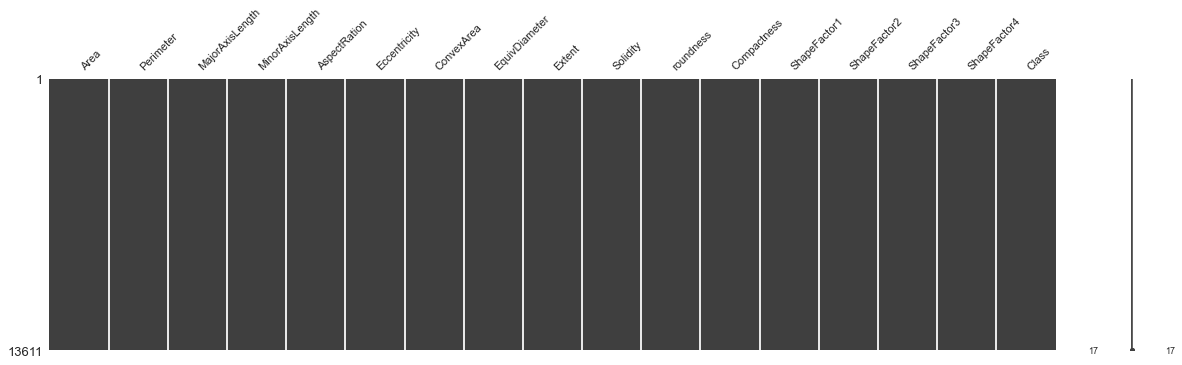

In [7]:
# Plot a matrix chart, set chart and font size
msno.matrix(raw_data, figsize=(20,5), fontsize=11)

In [8]:
dfSummary(raw_data)

In [9]:
raw_data.isna().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [10]:
raw_data = raw_data.sample(random_state=0, frac=1).reset_index(drop=True)

In [11]:
raw_data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  37277     710.19           264.79           179.81          1.47   
1  28942     638.82           239.86           154.00          1.56   
2  38290     719.89           270.45           180.51          1.50   
3  37641     742.54           284.31           169.74          1.67   
4  50172     828.97           316.45           202.27          1.56   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0          0.73       37684         217.86    0.80      0.99       0.93   
1          0.77       29368         191.96    0.79      0.99       0.89   
2          0.74       38605         220.80    0.76      0.99       0.93   
3          0.80       38112         218.92    0.74      0.99       0.86   
4          0.77       50547         252.75    0.69      0.99       0.92   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.82          0.01          0.00          0.68          1.00   
1         0.80          0.01          0.00          0.64          1.00   
2         0.82          0.01          0.00          0.67          1.00   
3         0.77          0.01          0.00          0.59          0.99   
4         0.80          0.01          0.00          0.64          1.00   

      Class  
0  DERMASON  
1  DERMASON  
2  DERMASON  
3      SIRA  
4     SEKER

In [12]:
output_dummy = pd.get_dummies(raw_data.Class)

In [13]:
output_dummy

BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
0             0       0     0         1      0      0     0
1             0       0     0         1      0      0     0
2             0       0     0         1      0      0     0
3             0       0     0         0      0      0     1
4             0       0     0         0      0      1     0
...         ...     ...   ...       ...    ...    ...   ...
13606         0       0     0         1      0      0     0
13607         1       0     0         0      0      0     0
13608         0       0     0         0      0      0     1
13609         0       0     0         1      0      0     0
13610         1       0     0         0      0      0     0

[13611 rows x 7 columns]

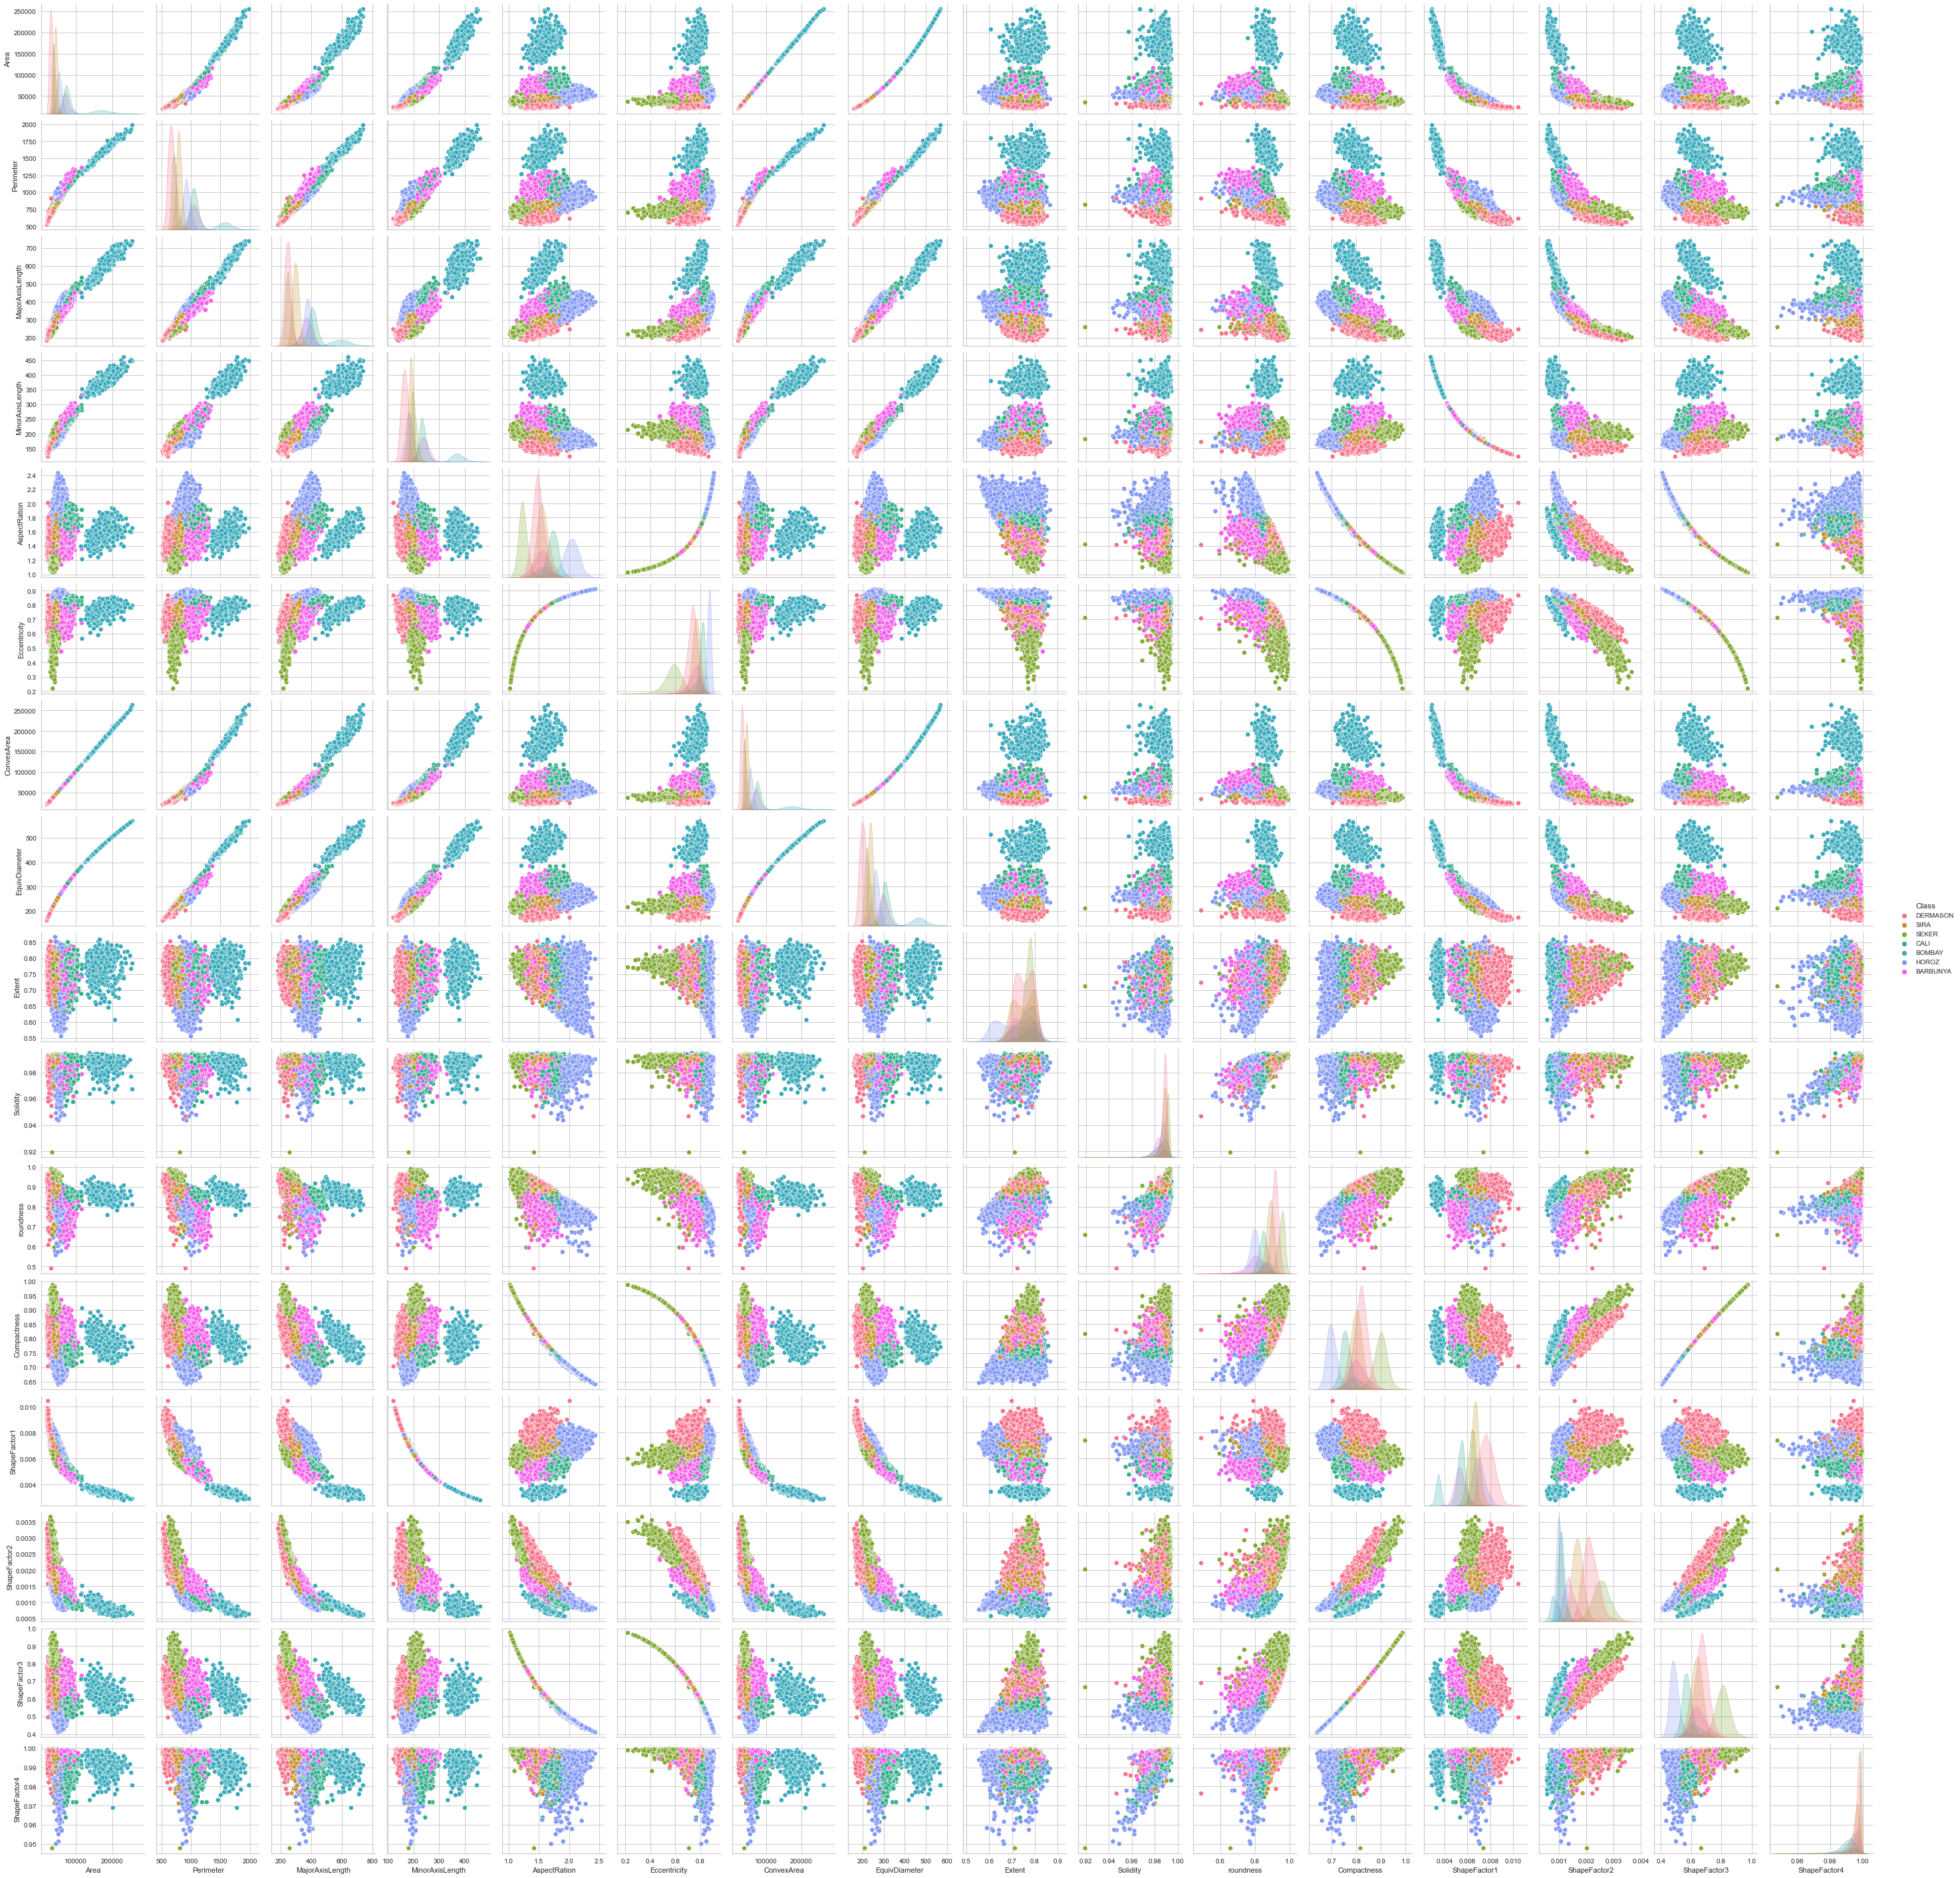

In [14]:
sns.pairplot(raw_data, hue ='Class')
plt.show()

In [15]:
full_df = raw_data.copy()

<Figure size 1440x1440 with 0 Axes>

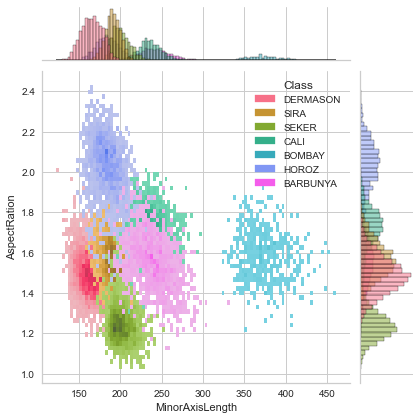

In [16]:
#Joint plots
plt.figure(figsize=(20,20))
sns.jointplot(data=raw_data, x='MinorAxisLength', y='AspectRation', hue='Class', kind='hist')

In [17]:
# ONE-HOT ENCODER
temp_df = pd.DataFrame({'Class': raw_data.Class.value_counts().index.to_list()})

le = LabelEncoder()
raw_data['Class'] = le.fit_transform(raw_data['Class'])

In [18]:
# lb = LabelBinarizer()
# lb.fit(raw_data.Class.value_counts().index.to_list())
# print(lb.classes_)
# lb.transform(raw_data.Class)

In [19]:
y = raw_data.Class
raw_data.drop('Class', axis=1, inplace=True)

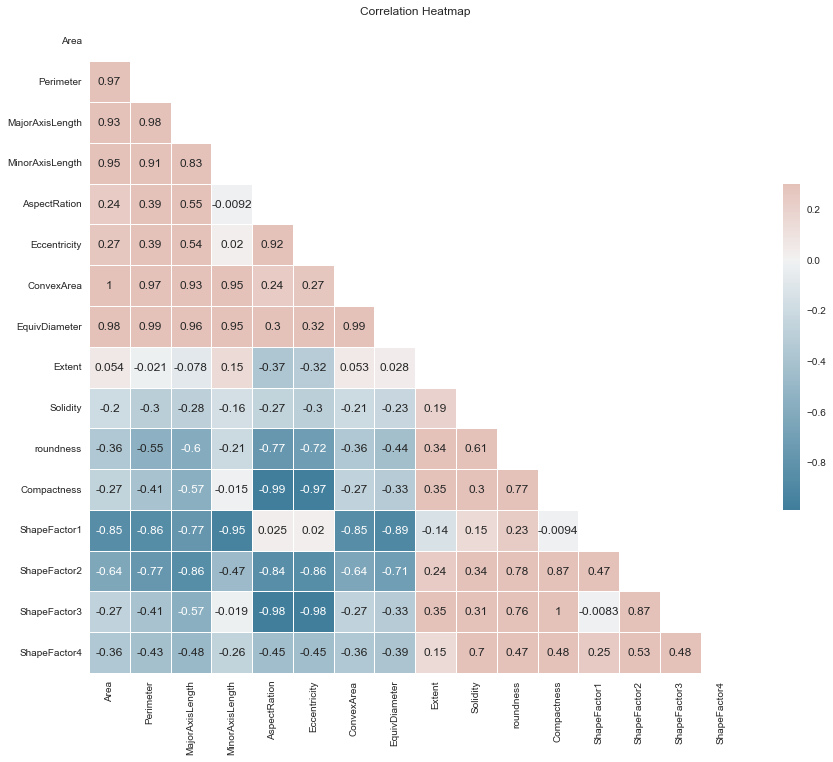

In [20]:
corr = raw_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size = 0.2, random_state = 0, shuffle = False)
sc = StandardScaler()
ns = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[248   0  19   0   1   0   8]
 [  0 108   0   0   0   0   0]
 [  7   0 311   0   6   0   9]
 [  1   0   0 629   1   9  54]
 [  1   0   4   1 379   0  12]
 [  0   0   0   9   0 390  18]
 [  3   0   0  40   8   4 443]]
Accuracy:  92.10429673154609


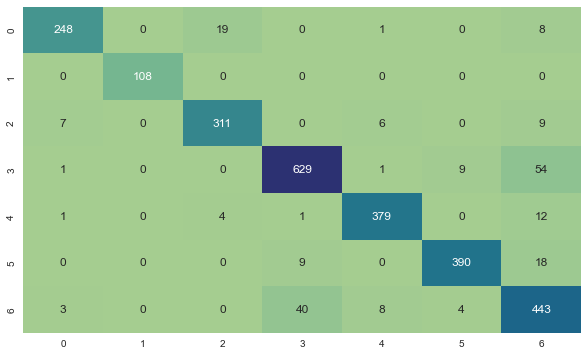

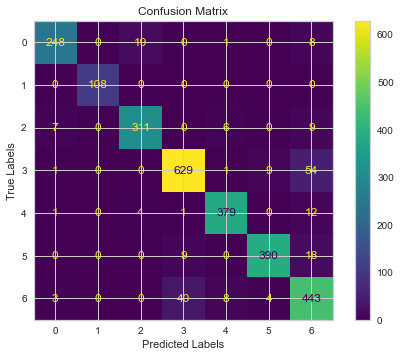

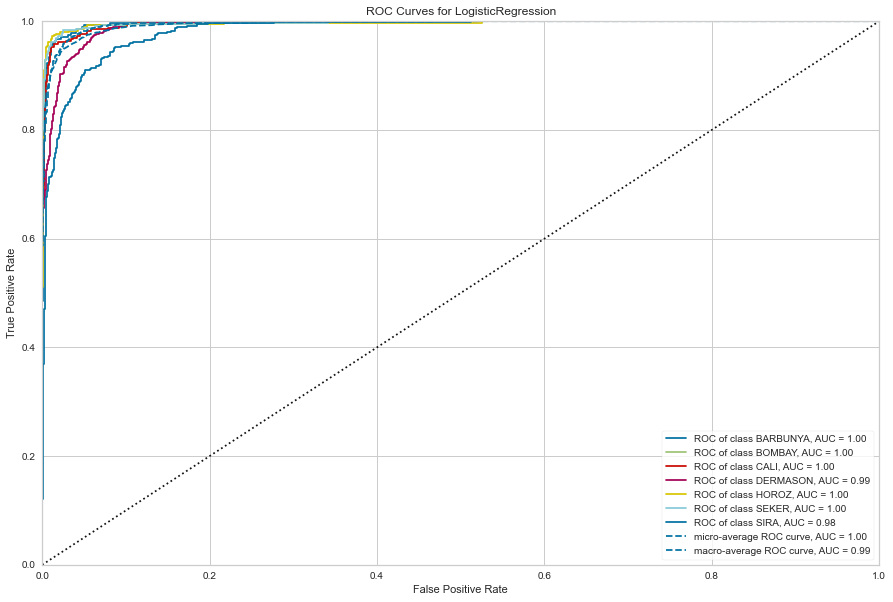

In [22]:
# LOGISTIC REGRESSION
lr = LogisticRegression(random_state=0, multi_class='ovr', solver = 'liblinear', n_jobs=-1, max_iter=5_000, C=1).fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

# print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
ConfusionMatrixDisplay.from_estimator(estimator=lr, X=X_test, y=y_test)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

plot_ROC_curve(model=lr, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

target_names = le.classes_.tolist()
pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names, output_dict=True)).T.style.background_gradient(axis=0, cmap='viridis')


[[249   0  15   0   3   2   7]
 [  0 108   0   0   0   0   0]
 [ 25   0 297   0   7   1   3]
 [  0   0   0 617   3  14  60]
 [  5   0   9   4 366   0  13]
 [  1   0   1  22   0 381  12]
 [  4   0   2  56  10   9 417]]
Accuracy:  89.42343004039662


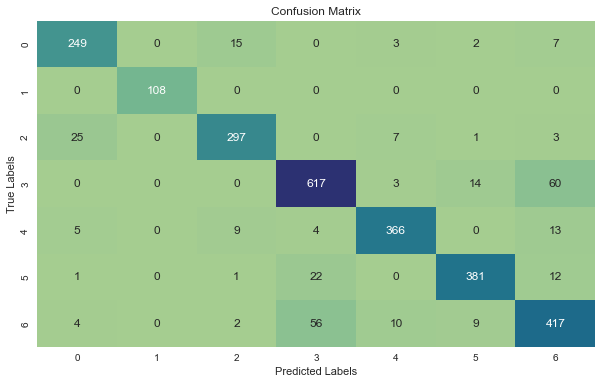

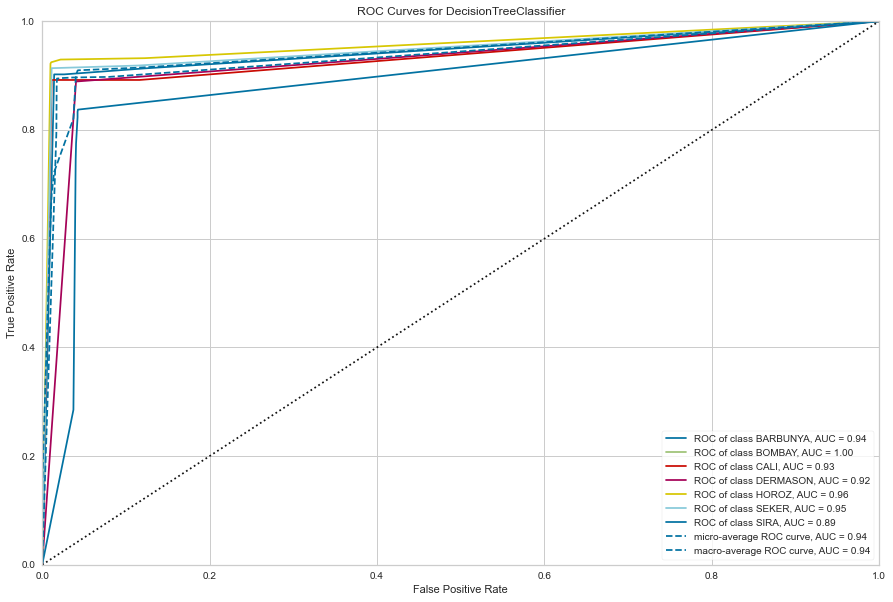

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON',
                4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'},
       estimator=DecisionTreeClassifier(max_depth=20))

In [23]:
# DECISION TREE
dtc = tree.DecisionTreeClassifier(max_depth=20)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plot_ROC_curve(model=dtc, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

[[254   0  17   0   1   1   3]
 [  0 108   0   0   0   0   0]
 [ 11   0 313   0   6   0   3]
 [  2   0   0 642   0   7  43]
 [  1   0   7   1 379   0   9]
 [  2   0   0  13   0 391  11]
 [  3   0   0  47   6   9 433]]
Accuracy:  92.54498714652956


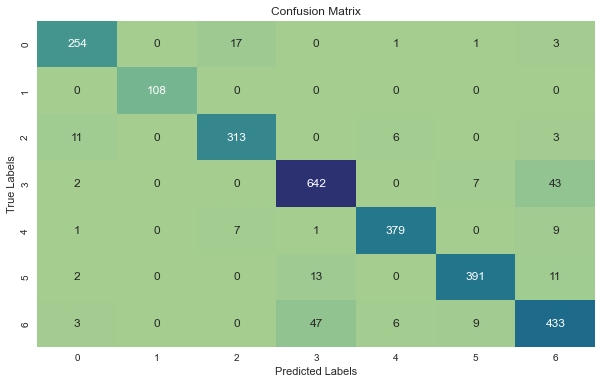

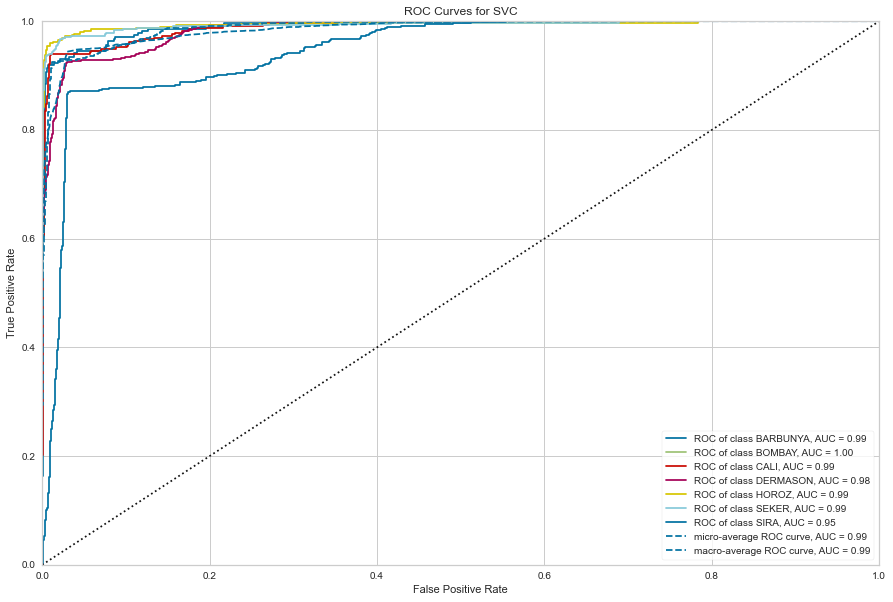

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON',
                4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'},
       estimator=SVC(gamma='auto', kernel='linear'))

In [24]:
# SVC
svc = SVC(gamma='auto', kernel='linear')
svc.fit(X_train, y_train.squeeze())
y_pred = svc.predict(X_test)
score = svc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plot_ROC_curve(model=svc, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

[[257   0  13   0   1   0   5]
 [  0 108   0   0   0   0   0]
 [  9   0 312   0   6   0   6]
 [  0   0   0 640   2  11  41]
 [  1   0   8   0 375   0  13]
 [  1   0   0  15   0 392   9]
 [  2   0   2  47   7   4 436]]
Accuracy:  92.54498714652956


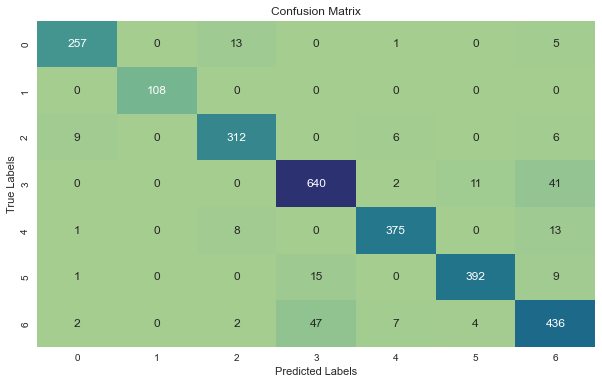

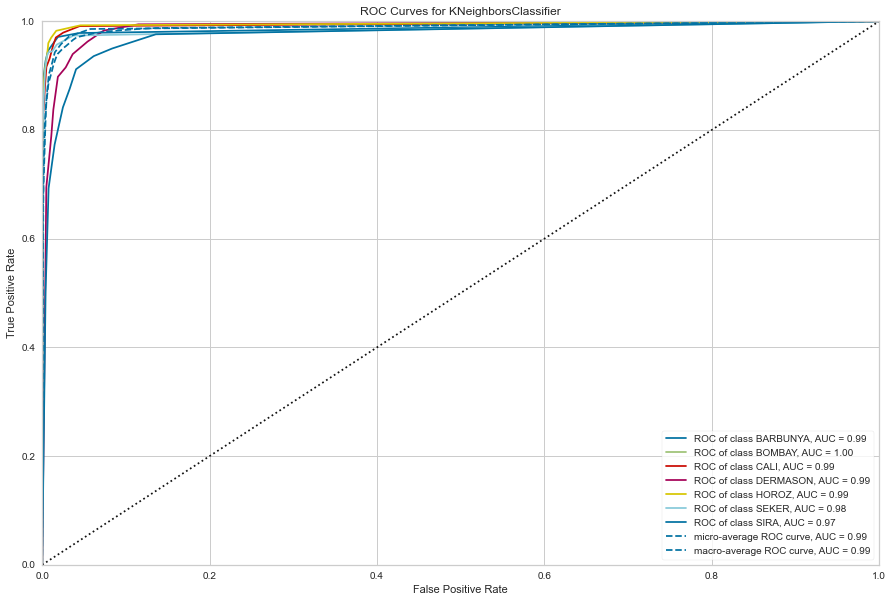

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON',
                4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'},
       estimator=KNeighborsClassifier(n_neighbors=9))

In [25]:
# KNC
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(X_train, y_train.squeeze())
y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plot_ROC_curve(model=knc, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

[[254   0  14   0   2   1   5]
 [  0 108   0   0   0   0   0]
 [ 13   0 311   0   5   1   3]
 [  0   0   0 648   2   7  37]
 [  4   0   4   1 378   0  10]
 [  1   0   0  18   0 388  10]
 [  3   0   1  46   7   6 435]]
Accuracy:  92.61843554902681


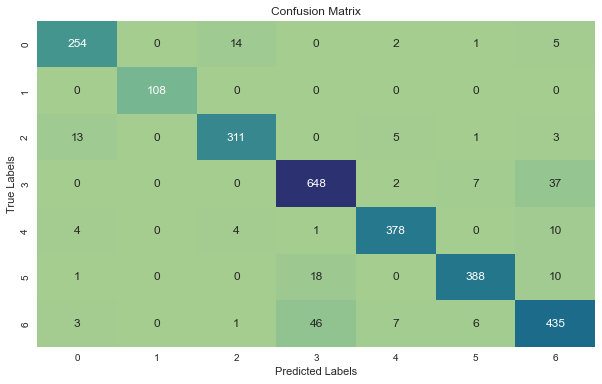

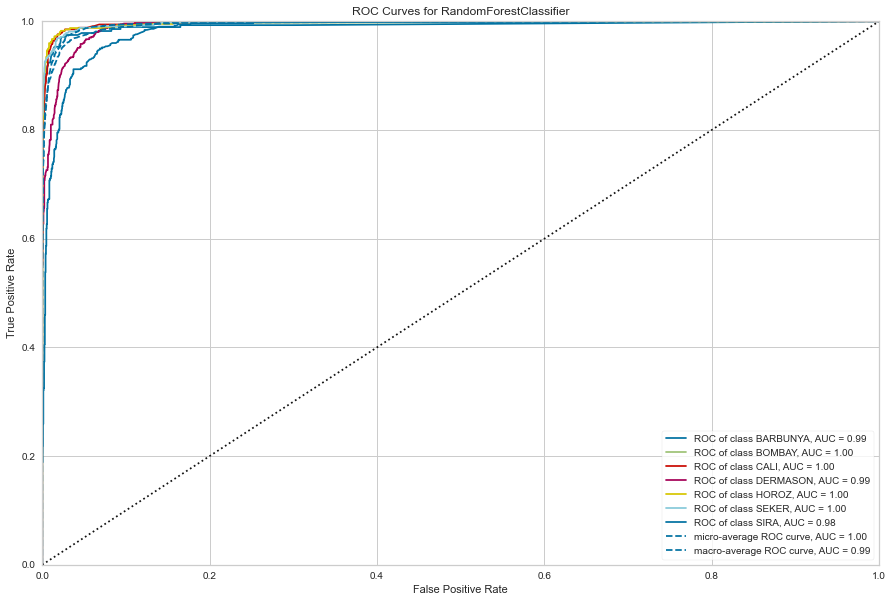

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON',
                4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'},
       estimator=RandomForestClassifier(max_depth=20, random_state=0))

In [26]:
# Random Forest
rfc = RandomForestClassifier(max_depth=20, random_state=0)
rfc.fit(X_train, y_train.squeeze())
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plot_ROC_curve(model=rfc, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

[[257   0  12   0   2   2   3]
 [  0 108   0   0   0   0   0]
 [  7   0 318   0   3   1   4]
 [  1   0   0 651   1   8  33]
 [  2   0   5   1 378   0  11]
 [  1   0   0  18   0 392   6]
 [  2   0   1  42   8   7 438]]
Accuracy:  93.35291957399926


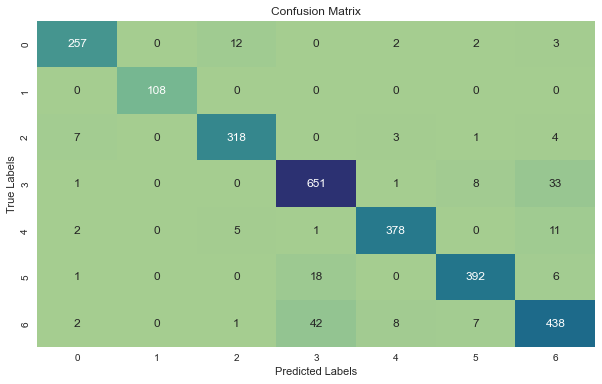

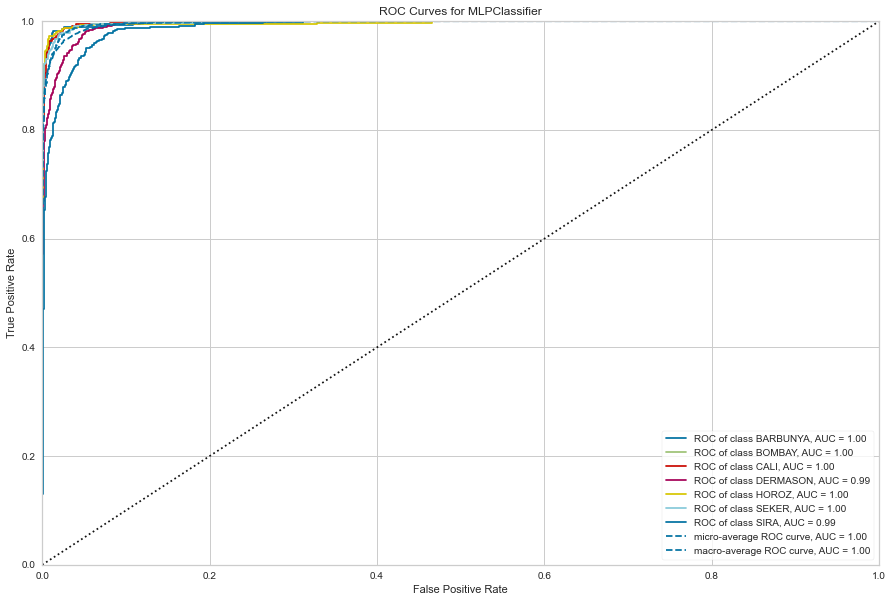

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON',
                4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'},
       estimator=MLPClassifier(hidden_layer_sizes=(300,), max_iter=1000,
                               random_state=0))

In [27]:
# MLP
mlp = MLPClassifier(random_state=0, max_iter=1_000, hidden_layer_sizes=(300,))
mlp.fit(X_train, y_train.squeeze())

y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test.squeeze())
cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy: ', score*100)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plot_ROC_curve(model=mlp, xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test, y=y)

In [28]:
# LAZY PREDICT
lzc = LazyClassifier(custom_metric=None)
models, predictions = lzc.fit(X_train, X_test, y_train, y_test)
models

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:19<00:00,  1.47it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
LGBMClassifier                     0.93               0.94    None      0.93   
XGBClassifier                      0.93               0.94    None      0.93   
KNeighborsClassifier               0.92               0.94    None      0.93   
LogisticRegression                 0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.92   
ExtraTreesClassifier               0.92               0.93    None      0.92   
SGDClassifier                      0.92               0.93    None      0.92   
QuadraticDiscriminantAnalysis      0.92               0.93    None      0.92   
LabelSpreading                     0.92               0.93    None      0.92   
LabelPropagation                   0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
LinearDiscriminantAnalysis         0.91               0.92    None      0.91   
PassiveAggressiveClassifier        0.90               0.91    None      0.90   
GaussianNB                         0.90               0.91    None      0.90   
RidgeClassifier                    0.91               0.91    None      0.91   
RidgeClassifierCV                  0.91               0.91    None      0.91   
NearestCentroid                    0.89               0.91    None      0.89   
DecisionTreeClassifier             0.89               0.91    None      0.89   
Perceptron                         0.88               0.91    None      0.88   
ExtraTreeClassifier                0.88               0.89    None      0.88   
BernoulliNB                        0.71               0.67    None      0.70   
AdaBoostClassifier                 0.62               0.50    None      0.57   
DummyClassifier                    0.25               0.14    None      0.10   

                               Time Taken  
Model                                      
SVC                                  0.90  
LGBMClassifier                       0.59  
XGBClassifier                        2.00  
KNeighborsClassifier                 0.10  
LogisticRegression                   0.14  
RandomForestClassifier               3.17  
CalibratedClassifierCV               0.51  
LinearSVC                            0.51  
ExtraTreesClassifier                 0.58  
SGDClassifier                        0.08  
QuadraticDiscriminantAnalysis        0.03  
LabelSpreading                       4.49  
LabelPropagation                     3.44  
BaggingClassifier                    1.22  
LinearDiscriminantAnalysis           0.02  
PassiveAggressiveClassifier          0.06  
GaussianNB                           0.01  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.02  
NearestCentroid                      0.01  
DecisionTreeClassifier               0.25  
Perceptron                           0.09  
ExtraTreeClassifier                  0.02  
BernoulliNB                          0.01  
AdaBoostClassifier                   1.36  
DummyClassifier                      0.01

<Figure size 1440x1440 with 0 Axes>

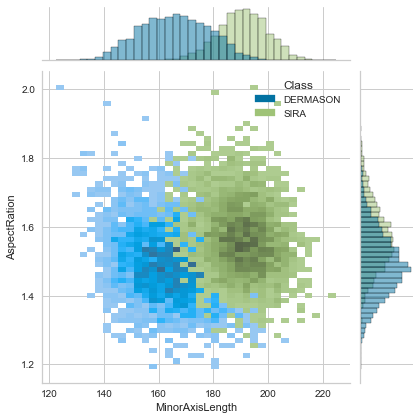

In [29]:
#Joint plots
plt.figure(figsize=(20,20))
sns.jointplot(data=full_df[full_df.Class.isin(['DERMASON', 'SIRA'])], x='MinorAxisLength', y='AspectRation', hue='Class', kind='hist')

Degree:  1


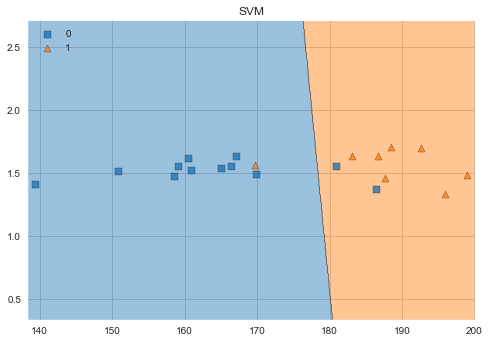

Degree:  2


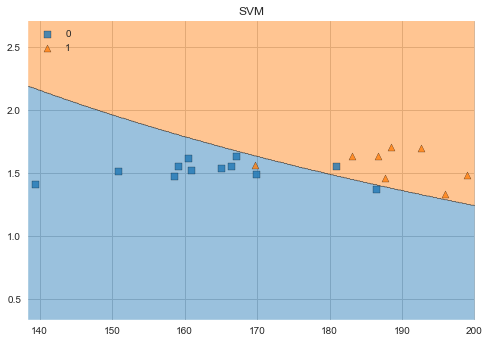

Degree:  3


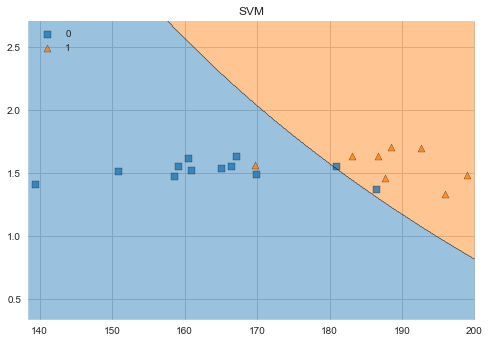

In [30]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

test_df = full_df[full_df.Class.isin(['DERMASON', 'SIRA'])].sample(random_state=4, frac=1).reset_index(drop=True)[0:20]
# ONE-HOT ENCODER
temp_df_test = pd.DataFrame({'Class': test_df.value_counts().index.to_list()})

le_test = LabelEncoder()
test_df['Class'] = le_test.fit_transform(test_df['Class'])


X_plot = test_df[['MinorAxisLength', 'AspectRation']].to_numpy()
y_plot = test_df.Class.to_numpy()
# Training a classifier
for degree in range(1, 4):
    svm = SVC(gamma='auto', kernel='poly', degree=degree)
    svm.fit(X_plot, y_plot)


    # # Plotting decision regions
    print('Degree: ', degree)
    plot_decision_regions(X_plot, y_plot, clf=svm, legend=2)

    # # Adding axes annotations
    plt.title('SVM')
    plt.show()

In [31]:
full_df.Class.unique()

array(['DERMASON', 'SIRA', 'SEKER', 'CALI', 'BOMBAY', 'HOROZ', 'BARBUNYA'],
      dtype=object)

C = 1.0


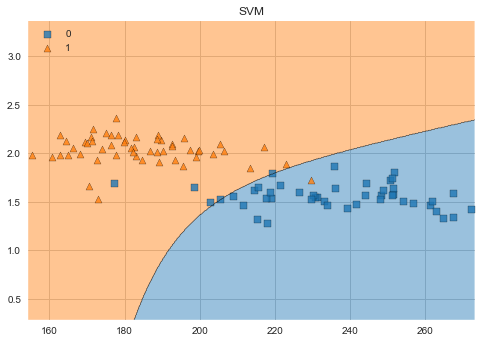

C = 6.444444444444445


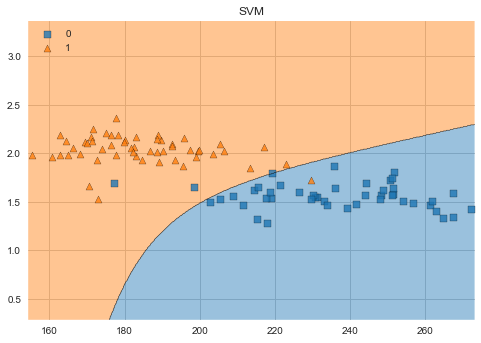

C = 11.88888888888889


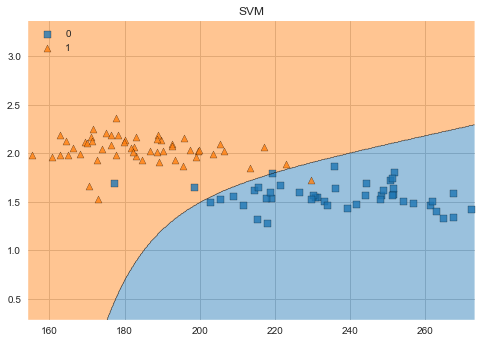

C = 17.333333333333336


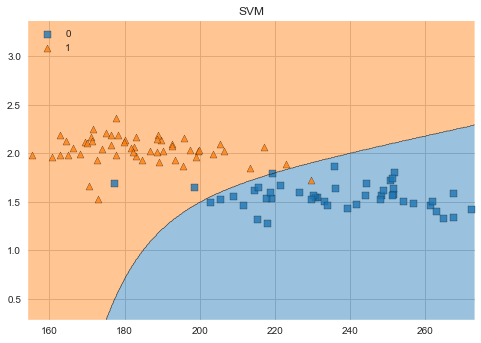

C = 22.77777777777778


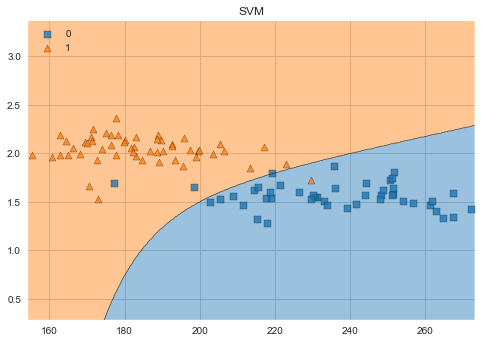

C = 28.22222222222222


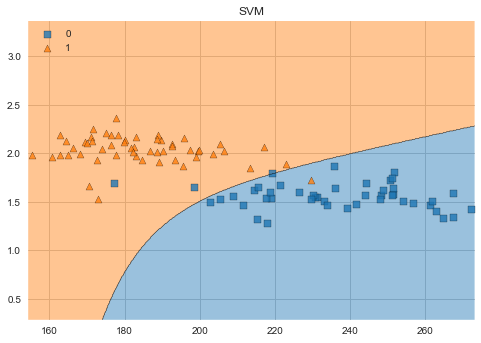

C = 33.66666666666667


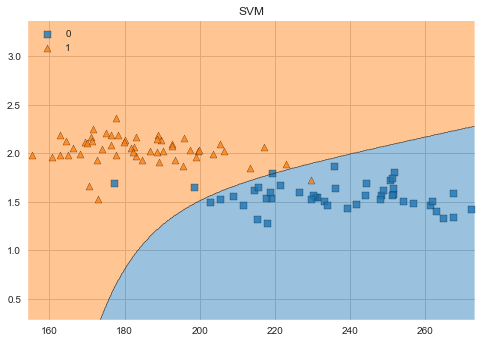

C = 39.111111111111114


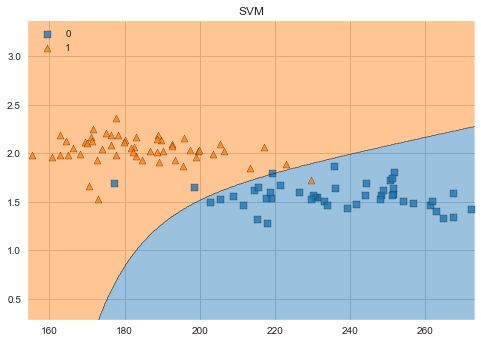

C = 44.55555555555556


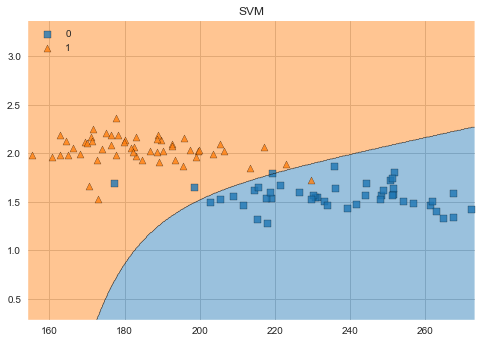

C = 50.0


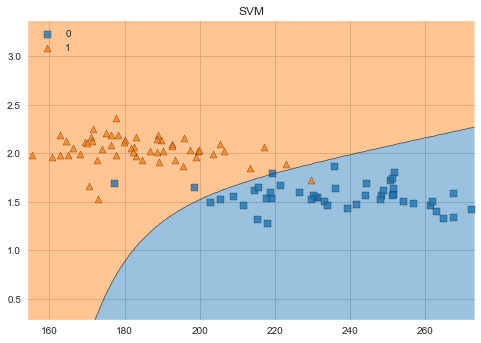

In [35]:
test_df = full_df[full_df.Class.isin(['BARBUNYA', 'HOROZ'])].sample(random_state=4, frac=1).reset_index(drop=True)[0:100]
# ONE-HOT ENCODER
temp_df_test = pd.DataFrame({'Class': test_df.value_counts().index.to_list()})

le_test = LabelEncoder()
test_df['Class'] = le_test.fit_transform(test_df['Class'])


X_plot = test_df[['MinorAxisLength', 'AspectRation']].to_numpy()
y_plot = test_df.Class.to_numpy()

for C in np.linspace(1, 50, 10):
    svm = SVC(kernel='poly', C=C, gamma='scale', degree=15)
    svm.fit(X_plot, y_plot)


    # # Plotting decision regions
    print(f'{C = }')
    plot_decision_regions(X_plot, y_plot, clf=svm, legend=2)

    # # Adding axes annotations
    plt.title('SVM')
    plt.show()

In [33]:
raw_data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')